Notebook for scores visualization

In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from datasets import load_dataset
from tqdm import tqdm
import csv


# Load the JSON data
with open('mri_reports3.json', 'r') as json_file:
    data = json.load(json_file)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)
df

dataset = load_dataset("sartajbhuvaji/Brain-Tumor-Classification")

In [12]:
len(dataset['Training']) # 2870
print("first label 0 ", dataset['Training']['label'].index(0))
print("first label 1 ", dataset['Training']['label'].index(1))
print("first label 2 ", dataset['Training']['label'].index(2))
print("first label 3 ", dataset['Training']['label'].index(3))

first label 0  0
first label 1  826
first label 2  1648
first label 3  2043


This is a T1 weighted image of a brain with glioma tumor. It is located in the left frontal lobe.


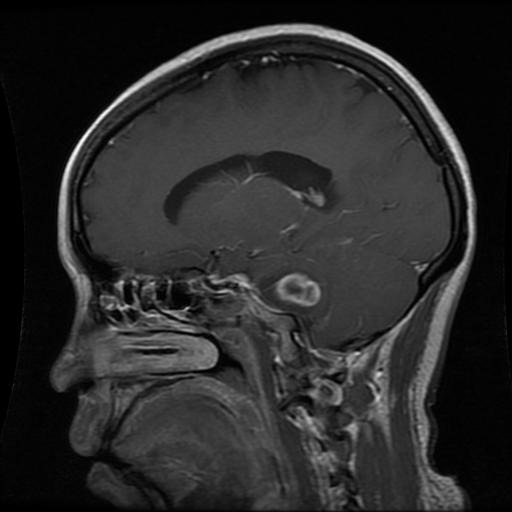

In [19]:
df_descriptions = pd.read_csv("mri_descriptions.csv")
print(df_descriptions['Description'][50])
dataset['Training']['image'][50]

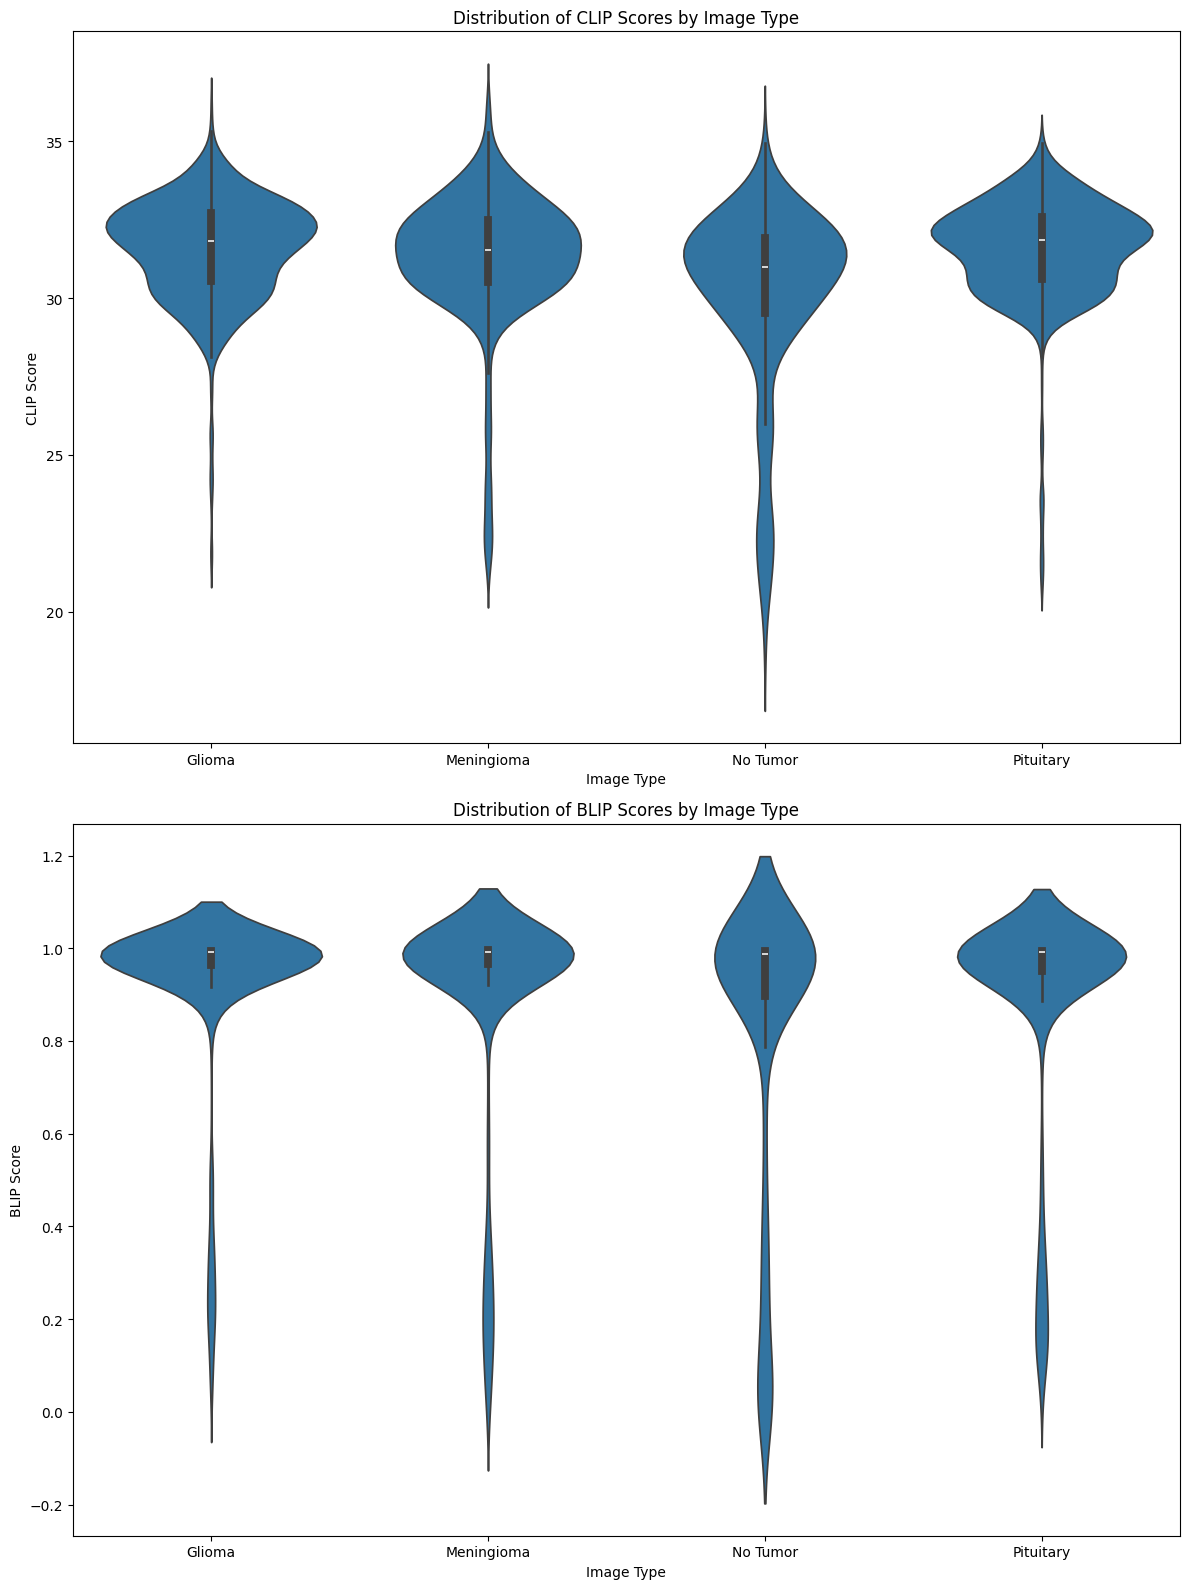

            CLIP_Score  BLIP_Score
Image_Type                        
Glioma       31.580626    0.924317
Meningioma   31.285047    0.892592
No Tumor     30.056720    0.814583
Pituitary    31.542129    0.887766


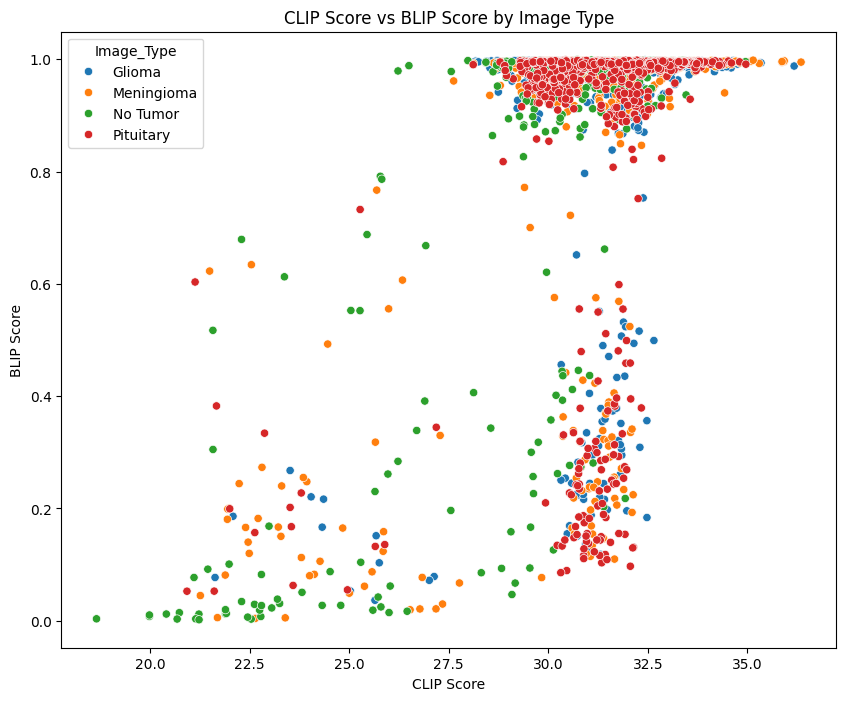

In [13]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the JSON data
with open('mri_reports3.json', 'r') as json_file:
    data = json.load(json_file)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Function to determine image type based on index
def get_image_type(index):
    # Assuming the index is a string like '0', '1', '2', etc.
    index = int(index)
    if index < 826:
        return 'Glioma'
    elif index < 1648:
        return 'Meningioma'
    elif index < 2043:
        return 'No Tumor'
    else:
        return 'Pituitary'

# Add image type to the DataFrame
df['Image_Type'] = df['Index'].apply(get_image_type)

# Create subplots for CLIP and BLIP scores
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Plot CLIP Score distribution
sns.violinplot(x='Image_Type', y='CLIP_Score', data=df, ax=ax1)
ax1.set_title('Distribution of CLIP Scores by Image Type')
ax1.set_xlabel('Image Type')
ax1.set_ylabel('CLIP Score')

# Plot BLIP Score distribution
sns.violinplot(x='Image_Type', y='BLIP_Score', data=df, ax=ax2)
ax2.set_title('Distribution of BLIP Scores by Image Type')
ax2.set_xlabel('Image Type')
ax2.set_ylabel('BLIP Score')

plt.tight_layout()
plt.savefig('score_distributions.png')
plt.show()

# Calculate and print average scores for each image type
print(df.groupby('Image_Type')[['CLIP_Score', 'BLIP_Score']].mean())

# Create a scatter plot of CLIP vs BLIP scores
plt.figure(figsize=(10, 8))
sns.scatterplot(x='CLIP_Score', y='BLIP_Score', hue='Image_Type', data=df)
plt.title('CLIP Score vs BLIP Score by Image Type')
plt.xlabel('CLIP Score')
plt.ylabel('BLIP Score')
plt.savefig('clip_vs_blip_scatter.png')
plt.show()